In [6]:
%%capture
!pip install ultralytics

In [16]:
from tqdm.notebook import tqdm
import cv2 as cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
import subprocess, os, random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
main_output_dir = '/content/drive/MyDrive/frames'
file_name = 'selected_frames.txt'

# Percorso completo del file da leggere
file_path = os.path.join(main_output_dir, file_name)

# Leggi il contenuto del file
with open(file_path, 'r') as file:
    content = file.readlines()

# Rimuovi eventuali spazi bianchi e caratteri di nuova riga
content = [int(x.strip()) for x in content]

# Estrai un numero a caso dall'elenco
if content:
    random_number = random.choice(content)
    print(f"Numero estratto a caso da '{file_name}': {random_number}")
else:
    print(f"Il file '{file_name}' è vuoto.")

Numero estratto a caso da 'selected_frames.txt': 148120


In [20]:
frame_number = random_number
source = f"/content/drive/MyDrive/frames/images/frame_{frame_number}.jpg"

command = "yolo predict model=yolov8n.pt source={}".format(source)

# Eseguire il comando utilizzando subprocess
try:
    result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Errore durante l'esecuzione del comando:")
    print(e.stderr)


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/drive/MyDrive/frames/images/frame_148120.jpg: 384x640 16 persons, 303.6ms
Speed: 6.1ms preprocess, 303.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict



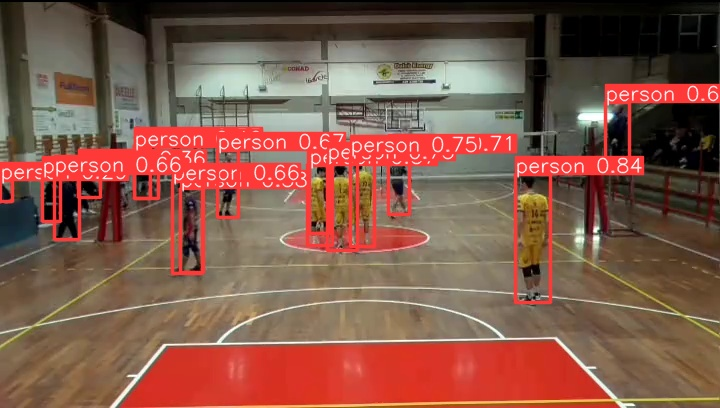

In [22]:
# Specify the path to the resulting image
resulting_image_path = f'runs/detect/predict2/frame_{frame_number}.jpg'

# Read the resulting image
resulting_image = cv2.imread(resulting_image_path)

# Display the resulting image
cv2_imshow(resulting_image)
cv2.waitKey(0)
cv2.destroyAllWindows()